In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('DRUG BATCH SIDE EFFECTS DATASET 0.1.csv')
df

,NAME,GENDER,DRUG_NAME,AGE,RACE,SIDE_EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects
...,...,...,...,...,...,...
399995,TRUE,M,lamisil,50.0,White,Severe Side Effects
399996,TRUE,M,klaron,55.0,"Hispanic, White",No Side Effects
399997,TRUE,M,celexa,57.0,Other,Severe Side Effects
399998,TRUE,F,zoloft,59.0,White,No Side Effects


# handling missing values


In [3]:
#checking for missing values
df.isna().sum()

NAME             0
GENDER           0
DRUG_NAME        0
AGE             20
RACE             0
SIDE_EFFECTS     0
dtype: int64

In [4]:
df.dtypes


NAME             object
GENDER           object
DRUG_NAME        object
AGE             float64
RACE             object
SIDE_EFFECTS     object
dtype: object

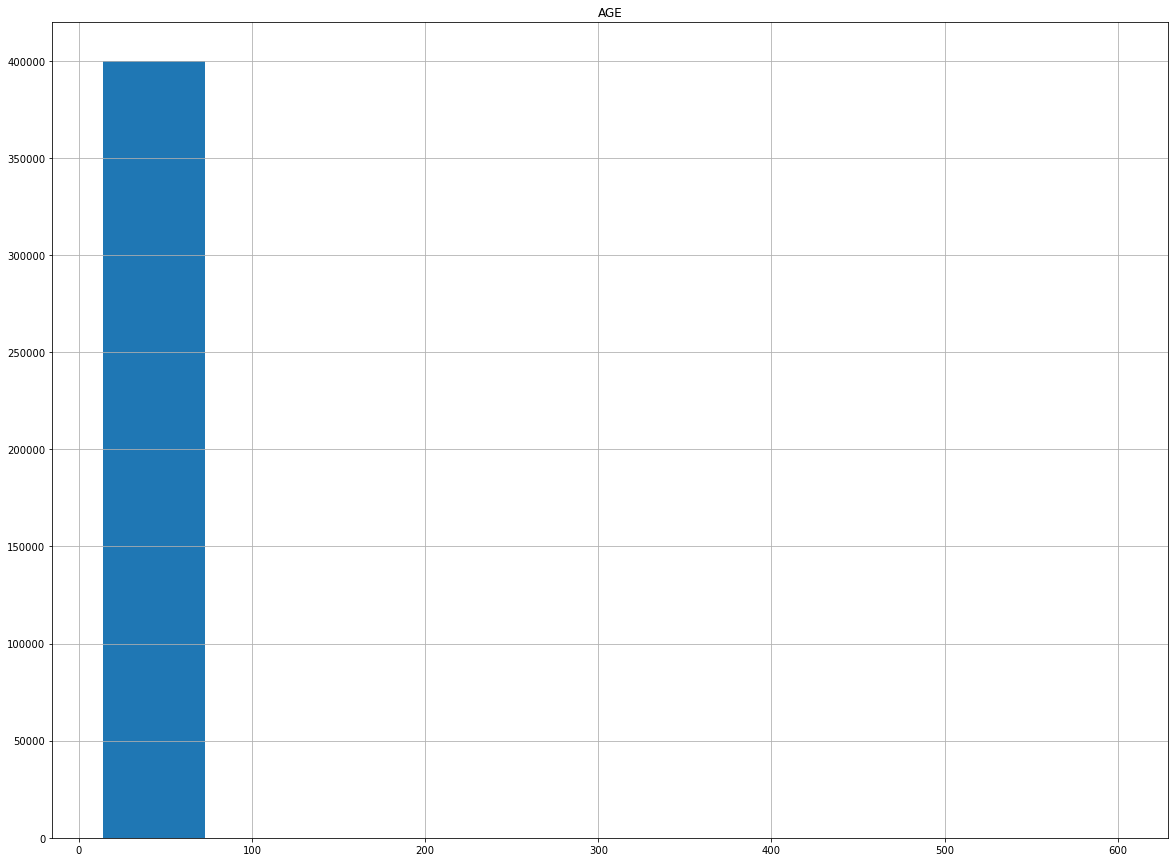

In [5]:
freqgraph = df.select_dtypes(include=['float'])     
freqgraph.hist(figsize=(20,15))
plt.show()

In [6]:
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df.isna().sum()

NAME            0
GENDER          0
DRUG_NAME       0
AGE             0
RACE            0
SIDE_EFFECTS    0
dtype: int64

## All missing values are filled


 # outlier detection


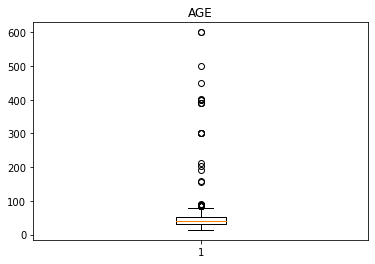

In [7]:
for i in ['AGE']:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [8]:
Q1 = np.percentile(df['AGE'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['AGE'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['AGE'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR


In [9]:
print(low_lim)
print(up_lim)


1.0
81.0


In [10]:
    df['AGE'].where(df['AGE'] >=low_lim,low_lim, inplace=True)  #replacing all lower outliers with lower limit
    df['AGE'].where(df['AGE'] <=up_lim,up_lim, inplace=True)  #replacing all upper outliers w 

{'whiskers': [<matplotlib.lines.Line2D at 0x27111616640>,
 'caps': [<matplotlib.lines.Line2D at 0x27111616c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x271116162b0>],
 'medians': [<matplotlib.lines.Line2D at 0x271116223a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27111622730>],
 'means': []}

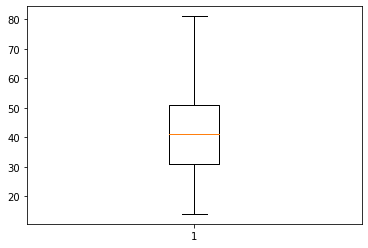

In [11]:
plt.boxplot(df['AGE'])


 ## outlier detection clear


In [12]:
#removing the unnecessary columns
df.drop(columns=['NAME'],inplace=True)

In [13]:
df.head()

,GENDER,DRUG_NAME,AGE,RACE,SIDE_EFFECTS
0,M,topamax,41.0,White,Mild Side Effects
1,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,F,tazorac,31.0,White,Mild Side Effects
3,F,voltaren,44.0,White,Severe Side Effects
4,M,tramadol,24.0,White,No Side Effects


In [14]:
# finding the number of unique values associated with each column
for i in df.columns:
    print(i," :",df[i].nunique())

GENDER  : 2
DRUG_NAME  : 502
AGE  : 64
RACE  : 9
SIDE_EFFECTS  : 5


# encoding


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['SIDE_EFFECTS'] = le.fit_transform(df['SIDE_EFFECTS'])
df['DRUG_NAME'] = le.fit_transform(df['DRUG_NAME'])



In [16]:
df=pd.get_dummies(df,columns=['GENDER','RACE'])


In [17]:
df.head()

,DRUG_NAME,AGE,SIDE_EFFECTS,GENDER_F,GENDER_M,RACE_Asian Indian,"RACE_Asian, Other",RACE_Black,RACE_Chinese,"RACE_Hispanic, Black","RACE_Hispanic, White",RACE_Other,RACE_Unknown,RACE_White
0,435,41.0,1,0,1,0,0,0,0,0,0,0,0,1
1,491,53.0,0,0,1,0,0,0,0,0,1,0,0,0
2,425,31.0,1,1,0,0,0,0,0,0,0,0,0,1
3,470,44.0,4,1,0,0,0,0,0,0,0,0,0,1
4,439,24.0,3,0,1,0,0,0,0,0,0,0,0,1


# splitting


In [18]:
X = df.drop(['SIDE_EFFECTS'], axis=1)
y = df['SIDE_EFFECTS']


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


In [20]:
X_train.shape


(320000, 13)

In [21]:
X_test.shape


(80000, 13)

# Scaling


In [22]:
X.describe()


,DRUG_NAME,AGE,GENDER_F,GENDER_M,RACE_Asian Indian,"RACE_Asian, Other",RACE_Black,RACE_Chinese,"RACE_Hispanic, Black","RACE_Hispanic, White",RACE_Other,RACE_Unknown,RACE_White
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.00000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,267.086642,41.453493,0.594378,0.405622,0.000260,0.00042,0.089612,0.000020,0.004182,0.110180,0.002525,0.007615,0.785185
std,148.736770,12.339246,0.491013,0.491013,0.016122,0.02049,0.285626,0.004472,0.064537,0.313114,0.050186,0.086931,0.410694
min,0.000000,14.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,139.000000,31.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,280.000000,41.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,395.000000,51.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,501.000000,81.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
from sklearn.preprocessing import StandardScaler
standardisation = StandardScaler()
X_train = standardisation.fit_transform(X_train)
X_test = standardisation.fit_transform(X_test)


# LR


In [24]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4552
           1       0.34      0.82      0.48     26672
           2       0.29      0.00      0.00     15068
           3       0.32      0.20      0.25     23070
           4       0.19      0.02      0.03     10638

    accuracy                           0.33     80000
   macro avg       0.23      0.21      0.15     80000
weighted avg       0.29      0.33      0.24     80000



# Decision tree


In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.72      0.74      4552
           1       0.81      0.82      0.81     26672
           2       0.78      0.74      0.76     15068
           3       0.78      0.81      0.79     23070
           4       0.77      0.74      0.75     10638

    accuracy                           0.79     80000
   macro avg       0.78      0.77      0.77     80000
weighted avg       0.79      0.79      0.79     80000



# Random Forest


In [26]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(X_train, y_train)
y_pred = rc.predict(X_test)


In [27]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4552
           1       0.93      0.95      0.94     26672
           2       0.95      0.89      0.92     15068
           3       0.92      0.95      0.94     23070
           4       0.91      0.88      0.89     10638

    accuracy                           0.93     80000
   macro avg       0.92      0.91      0.91     80000
weighted avg       0.93      0.93      0.93     80000

